In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!tar -xvf /content/enron_with_categories.tar.gz

enron_with_categories/
enron_with_categories/1/
enron_with_categories/1/114715.txt
enron_with_categories/1/114715.cats
enron_with_categories/1/229405.txt
enron_with_categories/1/229405.cats
enron_with_categories/1/232795.txt
enron_with_categories/1/232795.cats
enron_with_categories/1/62815.txt
enron_with_categories/1/62815.cats
enron_with_categories/1/118871.txt
enron_with_categories/1/118871.cats
enron_with_categories/1/106588.txt
enron_with_categories/1/106588.cats
enron_with_categories/1/122973.txt
enron_with_categories/1/122973.cats
enron_with_categories/1/106590.txt
enron_with_categories/1/106590.cats
enron_with_categories/1/139359.txt
enron_with_categories/1/139359.cats
enron_with_categories/1/136551.txt
enron_with_categories/1/136551.cats
enron_with_categories/1/98429.txt
enron_with_categories/1/98429.cats
enron_with_categories/1/221314.txt
enron_with_categories/1/221314.cats
enron_with_categories/1/54635.txt
enron_with_categories/1/54635.cats
enron_with_categories/1/136556.txt


In [ ]:
import numpy as np 
import pandas as pd
import csv
import glob
import os
import multiprocessing
import seaborn as sns
import email
import matplotlib.pyplot as plt

In [ ]:
#merge the folder contents and write to a csv file
path_folder = "/content/enron_with_categories"

folders = ['1', '2', '3', '4','5', '6', '7', '8']

filepaths = []
for folder in folders:
    filepaths.extend(glob.glob(os.path.join(path_folder, folder, "*.txt")))

with open('emailData.csv', mode='w', newline='') as new_file:
    writer = csv.writer(new_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for filename in filepaths:
        with open(filename, 'rt') as file:
            text = file.read()
        writer.writerow((filename, text))

In [ ]:
df = pd.read_csv("/content/emailData.csv", names = ['File', 'message'])
df.head()

,File,message
0,/content/enron_with_categories/1/152701.txt,Message-ID: <28138489.1075859787213.JavaMail.e...
1,/content/enron_with_categories/1/135786.txt,Message-ID: <12230907.1075844207844.JavaMail.e...
2,/content/enron_with_categories/1/175809.txt,Message-ID: <7327829.1075847624706.JavaMail.ev...
3,/content/enron_with_categories/1/173335.txt,Message-ID: <8205102.1075846145244.JavaMail.ev...
4,/content/enron_with_categories/1/177832.txt,Message-ID: <28000468.1075858883942.JavaMail.e...


In [ ]:
df.shape

(1702, 2)

In [ ]:
print(df.loc[1][1])

Message-ID: <12230907.1075844207844.JavaMail.evans@thyme>
Date: Thu, 17 May 2001 02:25:00 -0700 (PDT)
From: john.shelk@enron.com
To: steven.kean@enron.com, richard.shapiro@enron.com, james.steffes@enron.com, 
	linda.robertson@enron.com, tom.briggs@enron.com, 
	chris.long@enron.com, sarah.novosel@enron.com, 
	dwatkiss@bracepatt.com
Subject: President's Energy Plan -- Text of Key Electricity Recommendations
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: John Shelk
X-To: Steven J Kean, Richard Shapiro, James D Steffes, Linda Robertson, Tom Briggs, Chris Long, Sarah Novosel, dwatkiss@bracepatt.com
X-cc: 
X-bcc: 
X-Folder: \Richard_Shapiro_June2001\Notes Folders\All documents
X-Origin: SHAPIRO-R
X-FileName: rshapiro.nsf

Below is the exact wording of the recommendations in the Cheney energy report 
released today as the recommendations relate to electricity issues.

"The NEPD Group recommends that the President direct the Secretary of En

In [ ]:
message = df.loc[1][1]
e = email.message_from_string(message)
print(e.get_payload())

Below is the exact wording of the recommendations in the Cheney energy report 
released today as the recommendations relate to electricity issues.

"The NEPD Group recommends that the President direct the Secretary of Energy 
to propose comprehensive electricity legislation that promotes competition, 
protects consumers, enhances reliability, promotes renewable energy, improves 
efficiency, repeals the Public Utility Holding Company Act, and reforms the 
Public Utility Regulatory Policies Act."

"The NEPD Group recommends that the President encourage FERC to use its 
existing statutory authority to promote competition and encourage investment 
in transmission facilities."

More details to follow.  We expect to have the full report document shortly.


In [ ]:
# Extract different field of the email
def extract_field(f, messages):
    column = []
    if f == 'body':
      for message in messages:
          e = email.message_from_string(message)
          column.append(e.get_payload())
    else:
      for message in messages:
          e = email.message_from_string(message)
          column.append(e.get(f))
    return column

df['date'] = extract_field("Date", df['message'])
df['subject'] = extract_field("Subject", df['message'])
df['X-Folder'] = extract_field("X-Folder", df['message'])
df['X-From'] = extract_field("X-From", df['message'])
df['X-To'] = extract_field("X-To", df['message'])
df['body'] = extract_field("body", df['message'])
df.head(3)

,File,message,date,subject,X-Folder,X-From,X-To,body
0,/content/enron_with_categories/1/152701.txt,Message-ID: <28138489.1075859787213.JavaMail.e...,"Thu, 1 Mar 2001 00:09:00 -0800 (PST)",FW: Confidential Information and Securities Tr...,\Mark_Haedicke_Jun2001\Notes Folders\All docum...,Greg Piper,Mark E Haedicke,Any thoughts on our conversation a few days ag...
1,/content/enron_with_categories/1/135786.txt,Message-ID: <12230907.1075844207844.JavaMail.e...,"Thu, 17 May 2001 02:25:00 -0700 (PDT)",President's Energy Plan -- Text of Key Electri...,\Richard_Shapiro_June2001\Notes Folders\All do...,John Shelk,"Steven J Kean, Richard Shapiro, James D Steffe...",Below is the exact wording of the recommendati...
2,/content/enron_with_categories/1/175809.txt,Message-ID: <7327829.1075847624706.JavaMail.ev...,"Fri, 2 Mar 2001 04:37:00 -0800 (PST)",Enron Opportunity,\Steven_Kean_June2001_1\Notes Folders\All docu...,Steven J Kean,Mark S Muller,any interest?\n----- Forwarded by Steven J Kea...


In [ ]:
from sklearn.utils import shuffle
def emailClass(file):
    column = []
    for string in file:
        column.append(string.split("/")[3])
    return column

df['email_class'] = emailClass(df['File'])
# df=shuffle(df)

df['email_class_label'] = df['email_class']

df['email_class_label'] = df['email_class_label'].replace(['1','2','3','4','5','6','7','8'],['Company Business, Strategy','Purely Personal','Personal but in professional contex','Logistic Arrangements',' Employment arrangements','Document editing/checking','Empty message (due to missing attachment)','Empty message'])
df

,File,message,date,subject,X-Folder,X-From,X-To,body,email_class,email_class_label
0,/content/enron_with_categories/1/152701.txt,Message-ID: <28138489.1075859787213.JavaMail.e...,"Thu, 1 Mar 2001 00:09:00 -0800 (PST)",FW: Confidential Information and Securities Tr...,\Mark_Haedicke_Jun2001\Notes Folders\All docum...,Greg Piper,Mark E Haedicke,Any thoughts on our conversation a few days ag...,1,"Company Business, Strategy"
1,/content/enron_with_categories/1/135786.txt,Message-ID: <12230907.1075844207844.JavaMail.e...,"Thu, 17 May 2001 02:25:00 -0700 (PDT)",President's Energy Plan -- Text of Key Electri...,\Richard_Shapiro_June2001\Notes Folders\All do...,John Shelk,"Steven J Kean, Richard Shapiro, James D Steffe...",Below is the exact wording of the recommendati...,1,"Company Business, Strategy"
2,/content/enron_with_categories/1/175809.txt,Message-ID: <7327829.1075847624706.JavaMail.ev...,"Fri, 2 Mar 2001 04:37:00 -0800 (PST)",Enron Opportunity,\Steven_Kean_June2001_1\Notes Folders\All docu...,Steven J Kean,Mark S Muller,any interest?\n----- Forwarded by Steven J Kea...,1,"Company Business, Strategy"
3,/content/enron_with_categories/1/173335.txt,Message-ID: <8205102.1075846145244.JavaMail.ev...,"Wed, 15 Dec 1999 09:30:00 -0800 (PST)",Governor Ridge might call Ken Lay today,\Steven_Kean_Dec2000_1\Notes Folders\All docum...,Steven J Kean,Rosalee Fleming,FYI. These are the items I left Ken a voicema...,1,"Company Business, Strategy"
4,/content/enron_with_categories/1/177832.txt,Message-ID: <28000468.1075858883942.JavaMail.e...,"Sun, 8 Jul 2001 16:22:00 -0700 (PDT)",UC/CSU press release,"\SKEAN (Non-Privileged)\Kean, Steven J.\Sent I...",Steven J Kean,Linda Robertson <Linda Robertson/NA/Enron@ENRO...,fyi\n---------------------- Forwarded by Steve...,1,"Company Business, Strategy"
...,...,...,...,...,...,...,...,...,...,...
1697,/content/enron_with_categories/8/174465.txt,Message-ID: <32173095.1075846179551.JavaMail.e...,"Mon, 9 Oct 2000 03:46:00 -0700 (PDT)",Letter to Lynch from Us Describing Info ISO sh...,\Steven_Kean_Dec2000_1\Notes Folders\All docum...,Steven J Kean,Richard Shapiro,----- Forwarded by Steven J Kean/NA/Enron on 1...,8,Empty message
1698,/content/enron_with_categories/8/176744.txt,Message-ID: <6453004.1075846234689.JavaMail.ev...,"Fri, 15 Sep 2000 09:06:00 -0700 (PDT)",,\Steven_Kean_Dec2000_1\Notes Folders\Archiving...,Steven J Kean,Dave Martinez,test,8,Empty message
1699,/content/enron_with_categories/8/173252.txt,Message-ID: <3490571.1075846143093.JavaMail.ev...,"Wed, 8 Sep 1999 08:50:00 -0700 (PDT)",Re: India And The WTO Services Negotiation,\Steven_Kean_Dec2000_1\Notes Folders\All docum...,Steven J Kean,Kelly Kimberly,fyi\n---------------------- Forwarded by Steve...,8,Empty message
1700,/content/enron_with_categories/8/234267.txt,Message-ID: <4232844.1075860516484.JavaMail.ev...,"Tue, 1 Feb 2000 01:43:00 -0800 (PST)",confidential (client-attorney),\Richard_Sanders_Dec2000\Notes Folders\All doc...,Mary Hain,"Richard Sanders, Christian Yoder, ellen@tca-us...",---------------------- Forwarded by Mary Hain/...,8,Empty message


In [ ]:
#no of emails of each class
emails = pd.DataFrame(df['email_class_label'].value_counts())
emails.reset_index(inplace=True)
emails.columns = ['email_class_label', 'count']
emails.iloc[:,:]

,email_class_label,count
0,"Company Business, Strategy",834
1,Logistic Arrangements,476
2,Document editing/checking,143
3,Personal but in professional contex,100
4,Employment arrangements,74
5,Purely Personal,36
6,Empty message (due to missing attachment),21
7,Empty message,18


# Data Cleaning and Transformation

In [ ]:
#find and remove the duplicates
duplicate = df[df.duplicated(['subject','body'])]
duplicate
print(df.shape)
df.drop_duplicates(subset = ['subject','body'],inplace=True)
print(df.shape)

(1702, 10)
(1648, 10)


In [ ]:
# impute missing value with np.nan
def impute_data(subject):
    column = []
    for sub in subject:
        if (sub == ""):
            column.append(np.nan) 
        else:
            column.append(sub)
    return column


df['subject'] = impute_data(df['subject'])
df['X-To'] = impute_data(df['X-To'])

In [ ]:
df.isnull().sum()

File                   0
message                0
date                   0
subject               65
X-Folder               0
X-From                 0
X-To                 133
body                   0
email_class            0
email_class_label      0
dtype: int64

In [ ]:
# calculate percentage of missing values
print(df.isnull().sum() / df.shape[0])


File                 0.000000
message              0.000000
date                 0.000000
subject              0.039442
X-Folder             0.000000
X-From               0.000000
X-To                 0.080704
body                 0.000000
email_class          0.000000
email_class_label    0.000000
dtype: float64


In [ ]:
df.head(3)

,File,message,date,subject,X-Folder,X-From,X-To,body,email_class,email_class_label
0,/content/enron_with_categories/1/152701.txt,Message-ID: <28138489.1075859787213.JavaMail.e...,"Thu, 1 Mar 2001 00:09:00 -0800 (PST)",FW: Confidential Information and Securities Tr...,\Mark_Haedicke_Jun2001\Notes Folders\All docum...,Greg Piper,Mark E Haedicke,Any thoughts on our conversation a few days ag...,1,"Company Business, Strategy"
1,/content/enron_with_categories/1/135786.txt,Message-ID: <12230907.1075844207844.JavaMail.e...,"Thu, 17 May 2001 02:25:00 -0700 (PDT)",President's Energy Plan -- Text of Key Electri...,\Richard_Shapiro_June2001\Notes Folders\All do...,John Shelk,"Steven J Kean, Richard Shapiro, James D Steffe...",Below is the exact wording of the recommendati...,1,"Company Business, Strategy"
2,/content/enron_with_categories/1/175809.txt,Message-ID: <7327829.1075847624706.JavaMail.ev...,"Fri, 2 Mar 2001 04:37:00 -0800 (PST)",Enron Opportunity,\Steven_Kean_June2001_1\Notes Folders\All docu...,Steven J Kean,Mark S Muller,any interest?\n----- Forwarded by Steven J Kea...,1,"Company Business, Strategy"


In [ ]:
#drop unnecessary columns
df.drop(['File','message','date','X-Folder','X-From','X-To'], axis=1, inplace=True)

In [ ]:
df.head()

,subject,body,email_class,email_class_label
0,FW: Confidential Information and Securities Tr...,Any thoughts on our conversation a few days ag...,1,"Company Business, Strategy"
1,President's Energy Plan -- Text of Key Electri...,Below is the exact wording of the recommendati...,1,"Company Business, Strategy"
2,Enron Opportunity,any interest?\n----- Forwarded by Steven J Kea...,1,"Company Business, Strategy"
3,Governor Ridge might call Ken Lay today,FYI. These are the items I left Ken a voicema...,1,"Company Business, Strategy"
4,UC/CSU press release,fyi\n---------------------- Forwarded by Steve...,1,"Company Business, Strategy"


In [ ]:
# save the data
df.to_csv("cleaned_data.csv", index=False)

# Data Preprocessing

In [ ]:
import matplotlib.pyplot as plt
import re
import string
import time
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
from tqdm.auto import tqdm
from wordcloud import STOPWORDS
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings(action="ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("/content/cleaned_data.csv")
df.head(3)

,subject,body,email_class,email_class_label
0,FW: Confidential Information and Securities Tr...,Any thoughts on our conversation a few days ag...,1,"Company Business, Strategy"
1,President's Energy Plan -- Text of Key Electri...,Below is the exact wording of the recommendati...,1,"Company Business, Strategy"
2,Enron Opportunity,any interest?\n----- Forwarded by Steven J Kea...,1,"Company Business, Strategy"


In [ ]:
df.shape

(1648, 4)

In [ ]:
#no of emails of each class
emails = pd.DataFrame(df['email_class'].value_counts())
emails.reset_index(inplace=True)
emails.columns = ['email_class', 'count']
emails.iloc[:,:]

,email_class,count
0,1,793
1,4,471
2,6,141
3,3,97
4,5,74
5,2,35
6,7,21
7,8,16


#### Remove emails of class 7 ,8 as it is not required for classification. Those could impact the classifier.

In [ ]:
df = df.loc[~df['email_class'].isin([7,8])]
emails = pd.DataFrame(df['email_class'].value_counts())
emails.reset_index(inplace=True)
emails.columns = ['email_class', 'count']
emails.iloc[:,:]



,email_class,count
0,1,793
1,4,471
2,6,141
3,3,97
4,5,74
5,2,35


In [ ]:
# Combine subject and body column
df['text'] = df['subject'] + " " + df['body']

In [ ]:
# drop the columns 'subject' and 'body'
df.drop(['subject','body'], axis=1, inplace=True)

In [ ]:
df['text']

0       FW: Confidential Information and Securities Tr...
1       President's Energy Plan -- Text of Key Electri...
2       Enron Opportunity any interest?\n----- Forward...
3       Governor Ridge might call Ken Lay today FYI.  ...
4       UC/CSU press release fyi\n--------------------...
                              ...                        
1606    Re: Last FINAL version Has this gone to Ken ye...
1607    Re: Dereg Articles Looks good\n\n\n\n\tMark Pa...
1608    Re: Ken Lay Statement to Employees on Bush CO2...
1609    Re: Demonstration Procedure Looks good; nice w...
1610    Privileged and Confidential - Catalytica I've ...
Name: text, Length: 1611, dtype: object

In [ ]:
print(df.isnull().sum())

email_class           0
email_class_label     0
text                 61
dtype: int64


In [ ]:
def preprocess(df,field):
    df[field] = df[field].str.lower()
    df[field] = df[field].str.replace(r'\n+', ' ')
    df[field] = df[field].str.replace("["+string.punctuation+"]", " ")
    df[field] = df[field].str.replace(r'\s+', ' ')    
    return df


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm','im', 'll', 'y', 've', 
                      'u', 'ur', 'don','p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                      'de', 're', 'amp', 'will'])

def remove_stopwords(text):
  text = " ".join([stemmer.stem(word) for word in str(text).split()])
  text = [lemmatizer.lemmatize(word) for word in str(text).split() if not word in set(STOPWORDS)]
  text = ' '.join(text)
  return text



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df = preprocess(df, 'text')
# remove stopwords
df['text'] = df['text'].apply(remove_stopwords)


In [ ]:
df = shuffle(df)
print(df.isnull().sum())

email_class          0
email_class_label    0
text                 0
dtype: int64


In [ ]:
# apply label encoder on the 'email_class' column
class_le = LabelEncoder()
y = class_le.fit_transform(df['email_class'])

## 1. Bag-of-Words

In [ ]:
vectorizer = CountVectorizer(min_df=5, max_features=5000)
X = vectorizer.fit_transform(df['text'])
X = X.toarray()
print("X.shape: ",X.shape)

X.shape:  (1611, 5000)


### Training and Evaluation

In [ ]:
from sklearn.model_selection import ShuffleSplit
rf = RandomForestClassifier()
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)
dt = DecisionTreeClassifier()
svc = LinearSVC()
nb = MultinomialNB()
mlp = MLPClassifier(hidden_layer_sizes=(10,))

clfs = {
    "Random Forest": rf,
    "AdaBoost": ada,
    "Decision Tree":dt,
    "Support Vector Machine":svc,
    "Naive Bayes": nb,
    "Multilayer Perceptron":mlp
}

acc_scores = []

for name, model in clfs.items():
    print(name)
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
    }
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

    scores = cross_validate(model, X, y, cv=cv, n_jobs=4, scoring=scoring)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("\n")
    
    acc_scores.append(scores['test_acc'].mean())


models_df = pd.DataFrame({"Models":clfs.keys(),"Accuracy Scores":acc_scores}).sort_values('Accuracy Scores',ascending=False)
models_df


Random Forest
accuracy:  0.674922600619195
f1_score:  0.40891786217553094


AdaBoost
accuracy:  0.6202270381836944
f1_score:  0.4127976194618604


Decision Tree
accuracy:  0.6057791537667699
f1_score:  0.4130258825927254


Support Vector Machine
accuracy:  0.6295149638802889
f1_score:  0.4917346438858083


Naive Bayes
accuracy:  0.544891640866873
f1_score:  0.4185707742463949


Multilayer Perceptron
accuracy:  0.6666666666666666
f1_score:  0.4627453627587175




,Models,Accuracy Scores
0,Random Forest,0.674923
5,Multilayer Perceptron,0.666667
3,Support Vector Machine,0.629515
1,AdaBoost,0.620227
2,Decision Tree,0.605779
4,Naive Bayes,0.544892


## 2. Tf-Idf (Term Frequency - Inverse Document Frequency)

In [ ]:

vectorizer = TfidfVectorizer(min_df=5, max_features=5000)
X = vectorizer.fit_transform(df['text'])

X = X.toarray()
print("X.shape: ",X.shape)


X.shape:  (1611, 5000)


In [ ]:
from sklearn.model_selection import ShuffleSplit
rf = RandomForestClassifier()
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)
dt = DecisionTreeClassifier()
svc = LinearSVC()
nb = MultinomialNB()
mlp = MLPClassifier(hidden_layer_sizes=(10,))

clfs = {
    "Random Forest": rf,
    "AdaBoost": ada,
    "Decision Tree":dt,
    "Support Vector Machine":svc,
    "Naive Bayes": nb,
    "Multilayer Perceptron":mlp
}

acc_scores = []

for name, model in clfs.items():
    print(name)
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
    }
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

    scores = cross_validate(model, X, y, cv=cv, n_jobs=4, scoring=scoring)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("\n")
    
    acc_scores.append(scores['test_acc'].mean())


models_df = pd.DataFrame({"Models":clfs.keys(),"Accuracy Scores":acc_scores}).sort_values('Accuracy Scores',ascending=False)
models_df


Random Forest
accuracy:  0.675954592363261
f1_score:  0.38120527237889945


AdaBoost
accuracy:  0.5964912280701754
f1_score:  0.37729252954137377


Decision Tree
accuracy:  0.5727554179566563
f1_score:  0.3945256415195623


Support Vector Machine
accuracy:  0.6996904024767803
f1_score:  0.48215750582042965


Naive Bayes
accuracy:  0.6346749226006192
f1_score:  0.22074199913689121


Multilayer Perceptron
accuracy:  0.6707946336429309
f1_score:  0.4780025567910573




,Models,Accuracy Scores
3,Support Vector Machine,0.699690
0,Random Forest,0.675955
5,Multilayer Perceptron,0.670795
4,Naive Bayes,0.634675
1,AdaBoost,0.596491
2,Decision Tree,0.572755


# Using LSTM

In [ ]:
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, LSTM, Flatten, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session

In [ ]:
#load data
df.head()

,email_class,email_class_label,text
58,1,"Company Business, Strategy",updat jeff skill confer call john q anderson t...
347,1,"Company Business, Strategy",confidenti inform secur trade plea respond leg...
1186,4,Logistic Arrangements,price hedg zimin california thu vinc origin me...
1104,4,Logistic Arrangements,ihi arbitr privileg confidenti attorney client...
215,1,"Company Business, Strategy",confidenti inform secur trade nemec gerald ema...


## 4. Prepare Data

In [ ]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.2)

In [ ]:
# one-hot encode the output labels
Y_train = to_categorical(y_train, 6)
Y_test = to_categorical(y_test, 6)

In [ ]:
t = Tokenizer()
t.fit_on_texts(df['text'])
vocab_size = len(t.word_index) + 1

# encode the text
X_train_encoded = t.texts_to_sequences(X_train)
X_test_encoded = t.texts_to_sequences(X_test)

In [ ]:
max_length = 500
X_train_padded_docs = pad_sequences(X_train_encoded, maxlen=max_length, padding='post')
X_test_padded_docs = pad_sequences(X_test_encoded, maxlen=max_length, padding='post')


## 7. Word Embeddings using Training Data

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 2200, input_length=max_length))
model.add(LSTM(512,return_sequences=True, dropout=0.5))
model.add(LSTM(256,return_sequences=True, dropout=0.5))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 2200)         53046400  
                                                                 
 lstm (LSTM)                 (None, 500, 512)          5556224   
                                                                 
 lstm_1 (LSTM)               (None, 500, 256)          787456    
                                                                 
 flatten (Flatten)           (None, 128000)            0         
                                                                 
 dense (Dense)               (None, 6)                 768006    
                                                                 
Total params: 60,158,086
Trainable params: 60,158,086
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model
history = model.fit(X_train_padded_docs, Y_train, validation_split=0.2, epochs=10, verbose=1)

Epoch 1/10
33/33 [==============================] - 17s 262ms/step - loss: 2.1086 - accuracy: 0.4476 - val_loss: 1.2065 - val_accuracy: 0.5814
Epoch 2/10
33/33 [==============================] - 8s 239ms/step - loss: 0.8246 - accuracy: 0.7184 - val_loss: 1.0957 - val_accuracy: 0.6434
Epoch 3/10
33/33 [==============================] - 8s 242ms/step - loss: 0.3998 - accuracy: 0.8699 - val_loss: 1.1004 - val_accuracy: 0.6512
Epoch 4/10
33/33 [==============================] - 8s 245ms/step - loss: 0.2117 - accuracy: 0.9369 - val_loss: 1.3024 - val_accuracy: 0.6899
Epoch 5/10
33/33 [==============================] - 8s 246ms/step - loss: 0.1589 - accuracy: 0.9495 - val_loss: 1.4254 - val_accuracy: 0.6512
Epoch 6/10
33/33 [==============================] - 8s 248ms/step - loss: 0.1336 - accuracy: 0.9602 - val_loss: 1.6163 - val_accuracy: 0.6550
Epoch 7/10
33/33 [==============================] - 8s 252ms/step - loss: 0.1215 - accuracy: 0.9670 - val_loss: 1.3100 - val_accuracy: 0.6783
Epoch

In [ ]:
# evaluate the model
accuracy = model.evaluate(X_test_padded_docs, Y_test)

print("Test Set:\n  Loss: {:0.3f}\n Accuracy: {:0.3f}".format(accuracy[0], accuracy[1]))

11/11 [==============================] - 1s 70ms/step - loss: 1.4463 - accuracy: 0.6718
Test Set:
  Loss: 1.446
 Accuracy: 0.672


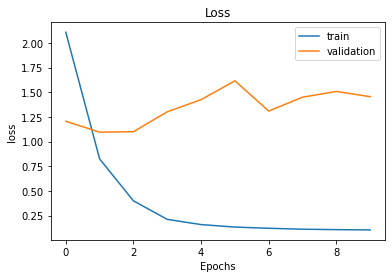

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.title("Loss")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()
plt.savefig('loss.png')

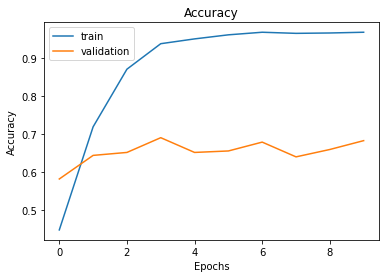

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.show()
plt.savefig('accuracy.png')